Note: These are the figures for a new modeling run on 03/02/024 with ~30 more puzzles included than the previous run

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

* Figures 1-5 were generated during the EDA process and were taken for the Github Readme from 02_IS2_EDA. 
* Figure 6 is a Methods schematic figure that was created in Power Point and can be found in the project Reporting folder in the 'layouts for IS2 summary' ppt deck. 
* Figure S1 comes from 04_IS2_Modeling (3 different components from ______ modeling sequence)

### Figure 7. Best Model Prediction Quality vs Benchmark Models
Data imported from 03_IS2_Preprocessing_Training-CompletionRangeFiltered, 04_IS2_Modeling
Best model was Gradient Boosting Regression Model (see notebook 4 for hyperparameters, other metrics besides RMSE, etc. for all models tested)

Note: Random state is 43 for ALL model variants now. Good balance of means between train and test at that #. Absolutely critical that this is changed for all model variants to be the same (was using 47 in first modeling round). 

In [3]:
data = [["Full_Best_Model", 9.154517577411816, 0.3178948070807089, 8.569891725473964], ["Mean_Sample_PDS_IST", 10.461435211969647, 0.3745502007988633, 10.045268390228376], ["Dummy", 13.94105241067033 , 0, 13.984023170009012]]
df = pd.DataFrame(data, columns=["Model_Inclusion", "Training_Error", "Training_SD", "Testing_Error"])
df

,Model_Inclusion,Training_Error,Training_SD,Testing_Error
0,Full_Best_Model,9.154518,0.317895,8.569892
1,Mean_Sample_PDS_IST,10.461435,0.374550,10.045268
2,Dummy,13.941052,0.000000,13.984023


(6.0, 16.0)

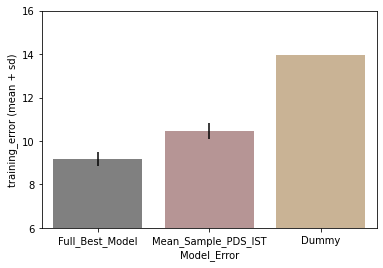

In [4]:
#plt.figure(figsize=(20, 10))
g = sns.barplot(x="Model_Inclusion",y="Training_Error",data=df, palette = ["gray", "rosybrown", "tan"], yerr=df["Training_SD"]*1)
g.set_ylabel("training_error (mean + sd)")
#g.set(xticklabels=["", ""])
g.set_xlabel("Model_Error")
g.set_ylim(6,16)

In [5]:
###### Mean target feature (IS2_ST, in minutes) value for training set across all 15x15 puzzles
y_train_mean = 18.072775649212414

In [6]:
# Calculate % difference from training set mean solve time represented by Full_Best_Model mean error
error_pct = (df['Training_Error'][0]/y_train_mean)*100
error_pct

50.653633703524434

In [7]:
# Calculate % difference from training set mean solve time represented by Mean PDS IST_ST mean error
error_pct = (df['Training_Error'][1]/y_train_mean)*100
error_pct

57.88504995039621

In [8]:
# Calculate % difference from training set mean solve time represented by Dummy mean error
error_pct = (df['Training_Error'][2]/y_train_mean)*100
error_pct

77.13841349697638

In [12]:
# Calculate % Improvement over 'Dummy' model and 'Smarty Benchmark' for 'Best Model'
BM_vs_Dummy = ((df['Training_Error'][0]-df['Training_Error'][2]))/abs(df['Training_Error'][2])*100
print(BM_vs_Dummy)

# Calculate % Improvement over 'Dummy' model and 'Smart Benchmark' for 'Best Model'
BM_vs_Smarty = ((df['Training_Error'][0]-df['Training_Error'][1]))/abs(df['Training_Error'][1])*100
print(BM_vs_Smarty)

-34.33409969533543
-12.49271833239952


### Figure 8. Effect on Model Prediction Quality of Removing Individual Feature Classes or Adjustments from the Best Model
Data imported from 03_IS2_Preprocessing_Training, 04_IS2_Modeling, and 04a_IS2_Modeling-FeatureSubtraction
No SOS Adjustment feature set generated in 01_IS2_Cleaning_Wrangling_Feature_Dev_no_SOS_adj and model itself generated in 04a_IS2_Modeling_no_SOS_adj

In [11]:
# Best Full Model
(9.154517577411816, 0.3178948070807089), 8.569891725473964

# No Past Performance Features OR DOW
(9.954496751391789, 0.5941912470479477), 9.97764428388961

# No Past Performance features
(9.5817195260109, 0.46351299895138387), 9.61198486927593

# No Answer Features
(9.52087466214258, 0.39977643262094437), 9.280102607039083

# No DOW
(9.278425663126495, 0.32628719583103766), 8.739322093476465

# No Circadian Features
(9.275176861160379, 0.30506728993763405), 8.801093496572054

# No CLue Features
(9.19516042442484, 0.31381697072246784), 8.615915881249623

# No Strength of Schedule Adjustment
(9.171403222553732, 0.2948101426998099), 8.339213576587126 

# No Grid Features
(9.14906394280869, 0.3431878278184749), 8.684197147635052

((7.983046740676125, 0.5119959170113279), 12.636308520600979)

In [44]:
#Feature subtraction modeling by feature class DF creation (raw data above)
data = [["Best Model", 9.154517577411816, 0.3178948070807089], ["-Past Performance Features and DOW", 9.954496751391789, 0.5941912470479477], ["-Past Performance Features", 9.5817195260109, 0.46351299895138387], ["-Answer Features", 9.52087466214258, 0.39977643262094437], ["-DOW", 9.278425663126495, 0.32628719583103766], ["-Circadian Features", 9.275176861160379, 0.30506728993763405], ["-Clue Features", 9.19516042442484, 0.31381697072246784],  ["-SOS Adjustment", 9.171403222553732, 0.2948101426998099], ["-Grid Features", 9.14906394280869, 0.3431878278184749]]
df = pd.DataFrame(data, columns=["Model Inclusion", "Training Error", "Training SD"])
df

,Model Inclusion,Training Error,Training SD
0,Best Model,9.154518,0.317895
1,-Past Performance Features and DOW,9.954497,0.594191
2,-Past Performance Features,9.581720,0.463513
3,-Answer Features,9.520875,0.399776
4,-DOW,9.278426,0.326287
5,-Circadian Features,9.275177,0.305067
6,-Clue Features,9.195160,0.313817
7,-SOS Adjustment,9.171403,0.294810
8,-Grid Features,9.149064,0.343188


In [45]:
data[0][1], data[3][1]

(9.154517577411816, 9.52087466214258)

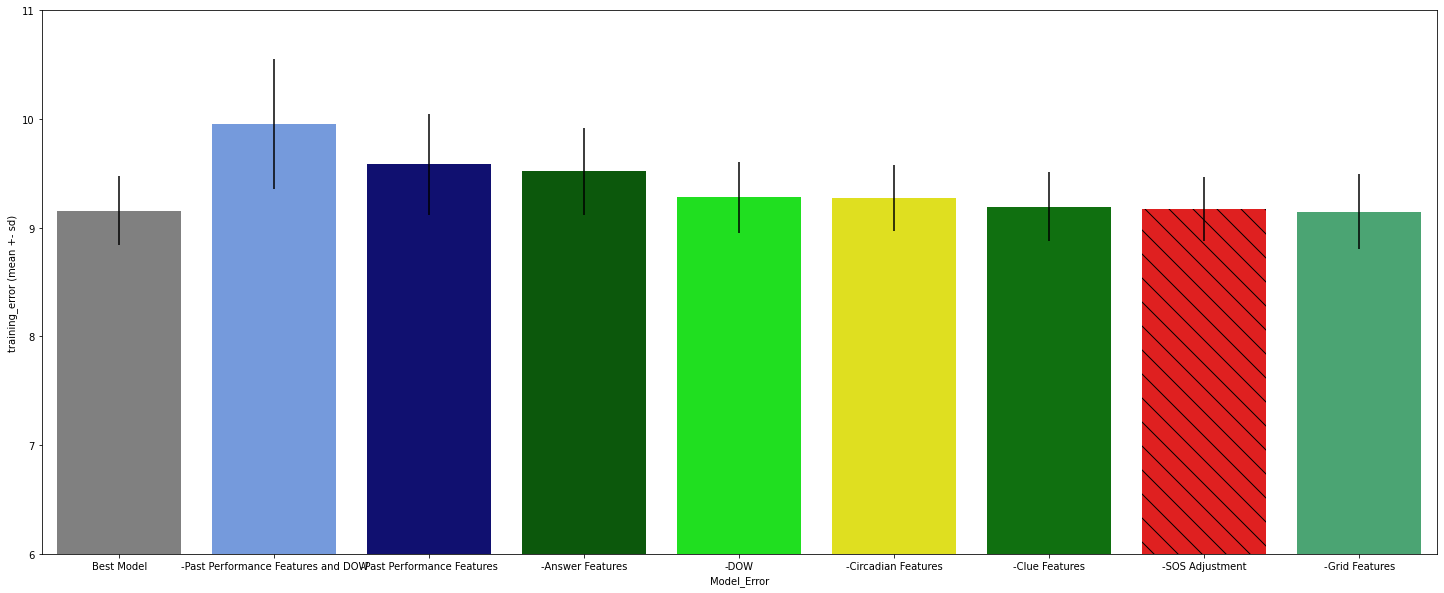

In [46]:
#subtraction modeling bar plot - all classes (Fig. 9)
plt.figure(figsize=(25, 10))
g = sns.barplot(x="Model Inclusion",y="Training Error",data=df, palette = ["gray","cornflowerblue", "navy", "darkgreen", "lime", "yellow", "green", "red", "mediumseagreen"], yerr=df["Training SD"]*1)
g.set_ylabel("training_error (mean +- sd)")
#g.set(xticklabels=["", ""])
g.set_xlabel("Model_Error")
g.set_ylim(6,11);

# Define some hatches
hatches = ['', '', '', '', '', '', '','\\','']

# Loop over the bars
for i,thisbar in enumerate(g.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])

In [47]:
# Percentage Change From Best Model
PPF_DOW_diff = ((data[1][1]- data[0][1])/(abs(data[1][1])))*100 
print(PPF_DOW_diff)

PPF_diff = ((data[2][1] - data[0][1])/(abs(data[2][1])))*100 
print(PPF_diff)

ANS_diff = ((data[3][1] - data[0][1])/(abs(data[3][1])))*100 
print(ANS_diff)

PDOW_diff = ((data[4][1] - data[0][1])/(abs(data[4][1])))*100 
print(PDOW_diff)

CIRC_diff = ((data[5][1] - data[0][1])/(abs(data[5][1])))*100 
print(CIRC_diff)

CLU_diff = ((data[6][1] - data[0][1])/(abs(data[6][1])))*100 
print(CLU_diff)

SOS_adj_diff = ((data[7][1] - data[0][1])/(abs(data[7][1])))*100 
print(SOS_adj_diff)

GRD_diff = ((data[8][1] - data[0][1])/(abs(data[8][1])))*100 
print(GRD_diff)

8.03635978753143
4.4585102646699815
3.8479351712032566
1.335442996618519
1.300883913640727
0.44200258763365263
0.1841119044945179
-0.05960866201414287


### Figure 9. Effect on Model Prediction Quality of Removing Key Individual Features
Data imported from 03_IS2_Preprocessing_Training, 04_IS2_Modeling, 04b_IS2_Modeling-FeatureSubtraction

#### Past Performance Features
Left panel in Figure 9

In [ ]:
# Past Performance Features
# #Below Best Model these are ranked by most increase in training error with the named feature subtracted out

# Best Full Model
(9.154517577411816, 0.3178948070807089), 8.569891725473964

# No Past Performance features
(9.5817195260109, 0.46351299895138387), 9.61198486927593 

# No number past solves features
(9.490616359595489, 0.35943644086168147), 8.848190836324811

# No RPB Standard Deviation
(9.227238806710316, 0.29066069590881605), 9.134950337246186

# No Past Performance vs Constructor
(9.221114972693439, 0.23437280440297162), 8.982530031434035 

# No RPB
(9.145897711954934, 0.44376214551604237), 8.761299162569816

# No overall past solves features (DS nor NDS)


#No Past Solves Last 7 Days #


In [51]:
#feature subtraction modeling -past performance features only
data = [["Best Model", 9.154517577411816, 0.3178948070807089], ["-Past Performance Features", 9.5817195260109, 0.46351299895138387], ["-Number of Past Solves", 9.490616359595489, 0.35943644086168147], ["-RPB STD", 9.227238806710316, 0.29066069590881605], ["-vs Constructor", 9.221114972693439, 0.23437280440297162], ["-RPB", 9.145897711954934, 0.44376214551604237]]
df = pd.DataFrame(data, columns=["Model Inclusion", "Training Error", "Training SD"])
df

,Model Inclusion,Training Error,Training SD
0,Best Model,9.154518,0.317895
1,-Past Performance Features,9.581720,0.463513
2,-Number of Past Solves,9.490616,0.359436
3,-RPB STD,9.227239,0.290661
4,-vs Constructor,9.221115,0.234373
5,-RPB,9.145898,0.443762


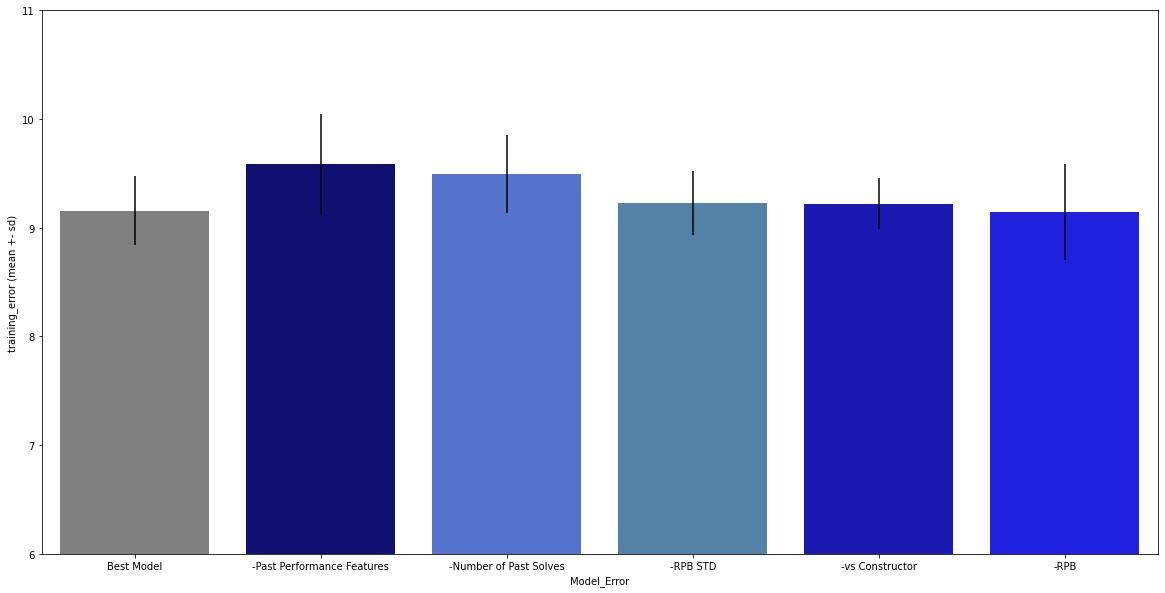

In [52]:
#subtraction modeling bar plot - past performance features (Fig. 9 left panel)
plt.figure(figsize=(20, 10))
g = sns.barplot(x="Model Inclusion",y="Training Error",data=df, palette = ["gray","navy", "royalblue", "steelblue", "mediumblue", "blue"], yerr=df["Training SD"]*1)
g.set_ylabel("training_error (mean +- sd)")
#g.set(xticklabels=["", ""])
g.set_xlabel("Model_Error")
g.set_ylim(6,11);

# # Define some hatches
# hatches = ['', '', '', '', '', '']

# # Loop over the bars
# for i,thisbar in enumerate(g.patches):
#     # Set a different hatch for each bar
#     thisbar.set_hatch(hatches[i])

In [53]:
# Percentage Change From Best Model
PPF_diff = ((data[1][1] - data[0][1])/(abs(data[1][1])))*100 
print(PPF_diff)

PS_diff = ((data[2][1] - data[0][1])/(abs(data[2][1])))*100 
print(PS_diff)

RPBSTD_diff = ((data[3][1] - data[0][1])/(abs(data[3][1])))*100 
print(RPBSTD_diff)

Const_diff = ((data[4][1] - data[0][1])/(abs(data[4][1])))*100 
print(Const_diff)

RPB_diff = ((data[5][1] - data[0][1])/(abs(data[5][1])))*100 
print(RPB_diff)

4.4585102646699815
3.5413799214827555
0.7881147418186987
0.7222271436679593
-0.09424843496352685


Subtractions of Other Individual Features (Non-Past Performance)
Right panel in Fig. 9

In [ ]:
#Below Best Model these are ranked by most increase in training error with the named feature subtracted out
# Non-Past Performance Features

# Best Full Model
(9.154517577411816, 0.3178948070807089), 8.569891725473964

# No DOW
(9.275761320635874, 0.3240633382817699), 8.765624245724556

# No Freshness Factor features
(9.264210325468022, 0.2632951331581911), 8.661088580045696

# Answer #
(9.245834985009946, 0.38883758341995317), 8.677306364377792

# Scrabble Average
(9.23017053109929, 0.2920702575818683), 8.58759027702099

# FITB
(9.197042513847359, 0.3958912831380177), 8.596787699909076

# Scrabble Score
(9.175398680042344, 0.21217081158359954), 8.797302364340089

# Open Squares
(9.172444528273832, 0.26284797492246864), 8.411157771040578

# Average Answer Length
(9.16436200397235, 0.4920247421762703), 8.73229058054183

# Completion Hour
(9.145548246450591, 0.3198492097200322), 8.909964449675728

# Black Squares
(9.141132193634638, 0.2647759946999733), 8.611636627466273

# Scrabble Illegal
(9.117263936087593, 0.3437638235978825), 8.660380190214896

# IS_per_sdp_avg_past_diff_from_RPB
(9.11459580111976, 0.3687494163011396), 8.47558082859733

# No. Unique Answers
(9.114539034793095, 0.2773826187281885), 8.582526479354414



# Rebus Count/Rebus Unique

# Shade Count

# Stacks

# Black Square Fill

# Unusual Symmetry

# Unused Letters

# Circle Count

# Cross Ref Clues Count

# Cheater Squares

# Wordplay 




In [26]:
#feature subtraction modeling -other features of interest
data = [["Best Model", 9.154517577411816, 0.3178948070807089], ["-DOW", 9.275761320635874, 0.3240633382817699], ["-FF", 9.264210325468022, 0.2632951331581911], ["-Answer Number", 9.245834985009946, 0.38883758341995317],["-Scrabble Average", 9.23017053109929, 0.2920702575818683], ["-FITB", 9.197042513847359, 0.3958912831380177], ["-Scrabble Score", 9.175398680042344, 0.21217081158359954], ["-Open Squares", 9.172444528273832, 0.26284797492246864], ["-AAL", 9.16436200397235, 0.4920247421762703], ["-Completion Hour", 9.145548246450591, 0.3198492097200322]]
df = pd.DataFrame(data, columns=["Model Inclusion", "Training Error", "Training SD"])
df

,Model Inclusion,Training Error,Training SD
0,Best Model,9.154518,0.317895
1,-DOW,9.275761,0.324063
2,-FF,9.264210,0.263295
3,-Answer Number,9.245835,0.388838
4,-Scrabble Average,9.230171,0.292070
5,-FITB,9.197043,0.395891
6,-Scrabble Score,9.175399,0.212171
7,-Open Squares,9.172445,0.262848
8,-AAL,9.164362,0.492025
9,-Completion Hour,9.145548,0.319849


In [27]:
# Percentage Change From Best Model

DOW_diff = ((data[1][1] - data[0][1])/(abs(data[1][1])))*100 # minus puzzle day of week
print(DOW_diff)

FF_diff = ((data[2][1] - data[0][1])/(abs(data[2][1])))*100 # minus freshness factor features
print(FF_diff)

AN_diff = ((data[3][1] - data[0][1])/(abs(data[3][1])))*100 # minus answer number
print(AN_diff)

SA_diff = ((data[4][1] - data[0][1])/(abs(data[4][1])))*100 # minus scrabble average
print(SA_diff)

FITB_diff = ((data[5][1] - data[0][1])/(abs(data[5][1])))*100 # minus FITB
print(FITB_diff)

SS_diff = ((data[6][1] - data[0][1])/(abs(data[6][1])))*100 # minus Scrabble Score
print(SS_diff)

OS_diff = ((data[7][1] - data[0][1])/(abs(data[7][1])))*100 # minus Open Squares
print(OS_diff)

AAL_diff = ((data[8][1] - data[0][1])/(abs(data[8][1])))*100 # minus Average Answer Length
print(AAL_diff)

CH_diff = ((data[9][1] - data[0][1])/(abs(data[9][1])))*100 # minus Completion Hour
print(CH_diff)

1.3071028784917735
1.1840485503081948
0.9876599327824942
0.819626825231187
0.4623762081290347
0.2275770607760771
0.19544354622975935
0.10742075178028344
-0.09807319057888207


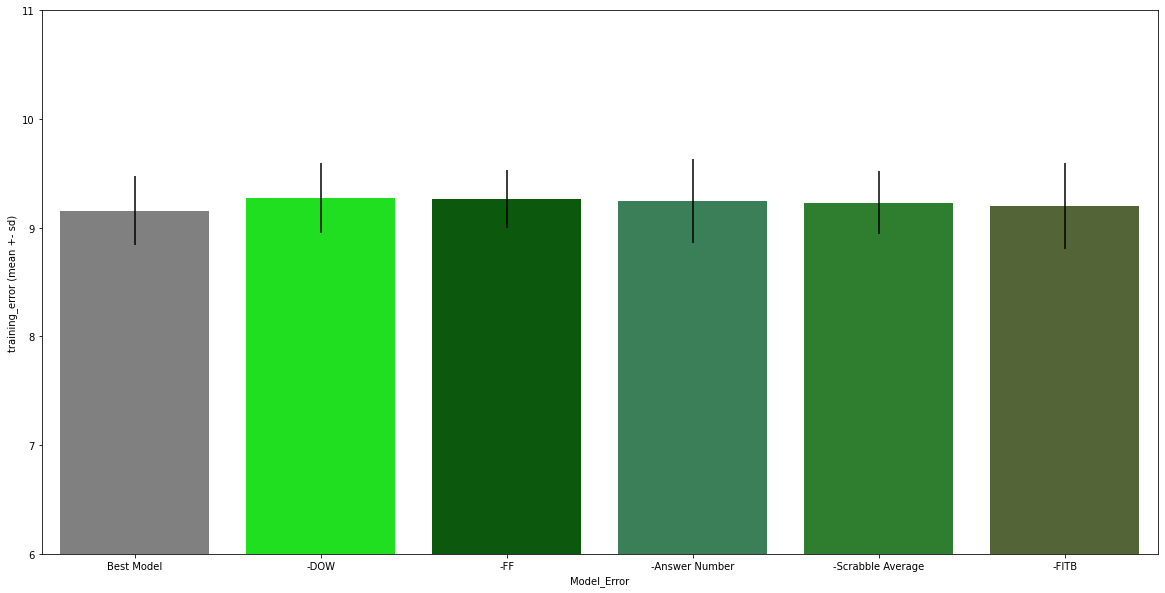

In [34]:
#subtraction modeling bar plot - other features of note (Fig. 9 right panel)
plt.figure(figsize=(20, 10))
g = sns.barplot(x="Model Inclusion",y="Training Error",data=df, palette = ["gray", "lime", "darkgreen", "seagreen", "forestgreen", "darkolivegreen"], yerr=df["Training SD"]*1)
g.set_ylabel("training_error (mean +- sd)")
#g.set(xticklabels=["", ""])
g.set_xlabel("Model_Error")
g.set_ylim(6,11);
g.set_xlim(-.5,5.5);

# # Define some hatches
# hatches = ['', '', '', '', '', '']

# # Loop over the bars
# for i,thisbar in enumerate(g.patches):
#     # Set a different hatch for each bar
#     thisbar.set_hatch(hatches[i])

### Figure 10. Best Puzzle Day-Specific Model (BPDM) Prediction Quality
Data imported from 03_IS2_Preprocessing_Training-ByPuzzleDay, 04_IS2_Modeling, 04b_IS2_Modeling-ByPuzzleDay

Note: Best model per day was derived using an 90/10 split for the best overall model (Linear Regressor)

90/10 Split Ns per puzzle day
Ns:
Sunday: 153 (137/16)
Monday: 153 (137/16)
Tuesday: 155 (139/16)
Wednesday: 156 (140/16)
Thursday: 176 (158/18)
Friday: 177 (159/18)
Saturday: 162 (145/17)

In [35]:
#Reorganizing training mean and sd to use Matplotlib because of Seaborn limitations with using pre-computed error bars per condition (very annoying that they can't address this)
#see https://stackoverflow.com/questions/23144784/plotting-error-bars-on-grouped-bars-in-pandas

df = pd.DataFrame([["Sunday",10.009056452287162,12.887944482644546,1.6777712352630123,0], ["Monday",1.7741253000623793,2.0678719322332024,0.4660097941467566,0], ["Tuesday",2.666136183641616,3.027501492493593,0.5973327506813298,0], ["Wednesday",5.223390741537597,5.562489725843399,1.2041654666385253,0], ["Thursday",8.233713538483256,9.65175643816161,0.3998047911527992,0], ["Friday",11.23176694165071,12.436828694297096,2.5578218674617013,0], ["Saturday",15.68578790694354,18.6855156801904,3.6531581846318133,0]], columns = ["DOW", "mean_1", "mean_2", "std_1", "std_2"])

#convert std columns to array for plotting
yerr = df[["std_1", "std_2"]].to_numpy().T

In [36]:
df['mean_1'][0]

10.009056452287162

In [37]:
# Also need mean training set IS2 STs per puzzle day so we can percentigize the error to normalize across puzzle days for comparison
Sun_training_mean = 36.57055961070561
Mon_training_mean = 6.37603406326034
Tue_training_mean= 8.920143884892083
Wed_training_mean= 13.135714285714291
Thu_training_mean= 22.647573839662442
Fri_training_mean=  23.610587002096437
Sat_training_mean=  34.02816091954022

In [38]:
# Normalize each puzzle day by the training set mean 
# Full Model - Mean

Sun_error_pct = ((df['mean_1'][0])/(Sun_training_mean))*100 
print(Sun_error_pct)

Mon_error_pct = ((df['mean_1'][1])/(Mon_training_mean))*100 
print(Mon_error_pct)

Tue_error_pct = ((df['mean_1'][2])/(Tue_training_mean))*100 
print(Tue_error_pct)

Wed_error_pct = ((df['mean_1'][3])/(Wed_training_mean))*100 
print(Wed_error_pct)

Thu_error_pct = ((df['mean_1'][4])/(Thu_training_mean))*100 
print(Thu_error_pct)

Fri_error_pct = ((df['mean_1'][5])/(Fri_training_mean))*100 
print(Fri_error_pct)

Sat_error_pct = ((df['mean_1'][6])/(Sat_training_mean))*100 
print(Sat_error_pct)

27.369164045707212
27.824903105288506
29.88893697283529
39.76480173003063
36.35583041598763
47.57089241641225
46.0964903276221


In [39]:
# Normalize each puzzle day subtraction by the training set mean without that day
# Full Model - stdev

Sun_error_pct = ((df['std_1'][0])/(Sun_training_mean))*100 
print(Sun_error_pct)

Mon_error_pct = ((df['std_1'][1])/(Mon_training_mean))*100 
print(Mon_error_pct)

Tue_error_pct = ((df['std_1'][2])/(Tue_training_mean))*100 
print(Tue_error_pct)

Wed_error_pct = ((df['std_1'][3])/(Wed_training_mean))*100 
print(Wed_error_pct)

Thu_error_pct = ((df['std_1'][4])/(Thu_training_mean))*100 
print(Thu_error_pct)

Fri_error_pct = ((df['std_1'][5])/(Fri_training_mean))*100 
print(Fri_error_pct)

Sat_error_pct = ((df['std_1'][6])/(Sat_training_mean))*100 
print(Sat_error_pct)

4.587764729670322
7.3087720285557225
6.696447483240978
9.167110675877838
1.7653316597322473
10.833368383575497
10.735690927493046


In [40]:
# Normalize each puzzle day subtraction by the training set mean without that day
# Dummy Model - Mean
Sun_error_pct = ((df['mean_2'][0])/(Sun_training_mean))*100 
print(Sun_error_pct)

Mon_error_pct = ((df['mean_2'][1])/(Mon_training_mean))*100 
print(Mon_error_pct)

Tue_error_pct = ((df['mean_2'][2])/(Tue_training_mean))*100 
print(Tue_error_pct)

Wed_error_pct = ((df['mean_2'][3])/(Wed_training_mean))*100 
print(Wed_error_pct)

Thu_error_pct = ((df['mean_2'][4])/(Thu_training_mean))*100 
print(Thu_error_pct)

Fri_error_pct = ((df['mean_2'][5])/(Fri_training_mean))*100 
print(Fri_error_pct)

Sat_error_pct = ((df['mean_2'][6])/(Sat_training_mean))*100 
print(Sat_error_pct)

35.24131055099236
32.4319461238231
33.94005221845388
42.346305688856745
42.61717615534869
52.67479666300885
54.911917586061755


In [41]:
#Reorganizing training mean and sd to use Matplotlib because of Seaborn limitations with using pre-computed error bars per condition (very annoying that they can't address this)
#see https://stackoverflow.com/questions/23144784/plotting-error-bars-on-grouped-bars-in-pandas
#Percentigized version (used this version in Github Summary)

df = pd.DataFrame([["Sunday",27.369164045707212,35.24131055099236,4.587764729670322,0], ["Monday",27.824903105288506,32.4319461238231,7.3087720285557225,0], ["Tuesday",29.88893697283529,33.94005221845388,6.696447483240978,0], ["Wednesday",39.76480173003063,42.346305688856745,9.167110675877838,0], ["Thursday",36.35583041598763,42.61717615534869,1.7653316597322473,0], ["Friday",47.57089241641225,52.67479666300885,10.833368383575497,0], ["Saturday",46.0964903276221,54.911917586061755,10.735690927493046,0]], columns = ["DOW", "mean_1", "mean_2", "std_1", "std_2"])

#convert std columns to array for plotting
yerr = df[["std_1", "std_2"]].to_numpy().T

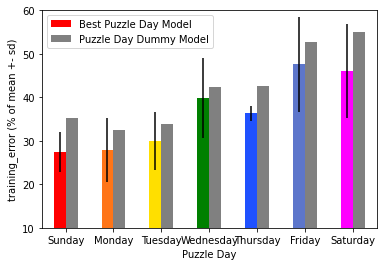

In [42]:
#Plot mean training error as % of puzzle day mean solve time
df[['mean_1', 'mean_2']].plot(kind='bar', yerr = yerr, stacked=False, color= [["red", "#FF7518", "#ffdf00", "g", "#1F51FF", "#5d76cb", "fuchsia"],["gray"]], error_kw=dict(ecolor='k'))
plt.xlabel('Puzzle Day')
plt.ylabel('training_error (% of mean +- sd)')
plt.ylim(10,60)
plt.legend(labels = ["Best Puzzle Day Model", "Puzzle Day Dummy Model"])
x = [0, 1, 2, 3, 4, 5, 6]
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
plt.xticks(x, labels, rotation="horizontal");